In [3]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import spacy
from scipy.sparse import hstack

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


import statsmodels.api as sm
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('corpus')

# Configurar visualización
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faboa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\faboa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\faboa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\faboa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Error loading corpus: Package 'corpus' not found in index


In [4]:
#Cargamos los csv EDA
subreddit_data = pd.read_csv('../data/subreddit_data.csv')
posts_data = pd.read_csv('../data/posts_data.csv')
subreddit_data = subreddit_data.fillna("")
posts_data = posts_data.fillna("")
combined_data = posts_data.merge(subreddit_data, on='subreddit_id', how='left')

# Tokenizacion y Lematizacion

In [5]:
class RedditTextProcessor:
    def __init__(self):
        # Inicializar el lematizador
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.columns_to_process = ["titlePost", "tittleSubreddit", "descriptionReddit"]

    def preprocess_text(self, text):
        # Tokenización
        text = str(text)
        tokens = word_tokenize(text.lower())
        # Lematización y filtrado de stopwords
        tokens = [
            self.lemmatizer.lemmatize(token) for token in tokens 
            if token.isalpha() and token not in self.stop_words
        ]
        # Se devuelve una cadena y no una lista de tokens para los modelos de aprendizaje
        return " ".join(tokens)
    
    def process_dataframe(self, df):
        for column in df.columns:
            if df[column].dtype == object and column  in self.columns_to_process:
                df[column] = df[column].apply(self.preprocess_text)
        return df

In [6]:
textProcessor = RedditTextProcessor()
processed_data = textProcessor.process_dataframe(combined_data)

# Clustering

c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=2, el coeficiente de silueta es 0.33205523507301865


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=3, el coeficiente de silueta es 0.3262015707329543


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=4, el coeficiente de silueta es 0.18823457248861358


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=5, el coeficiente de silueta es 0.11848397204612987


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=6, el coeficiente de silueta es 0.11467095856858235


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=7, el coeficiente de silueta es 0.07806908080282342


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=8, el coeficiente de silueta es 0.05433966753966667


c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Para k=9, el coeficiente de silueta es 0.05208717505537563


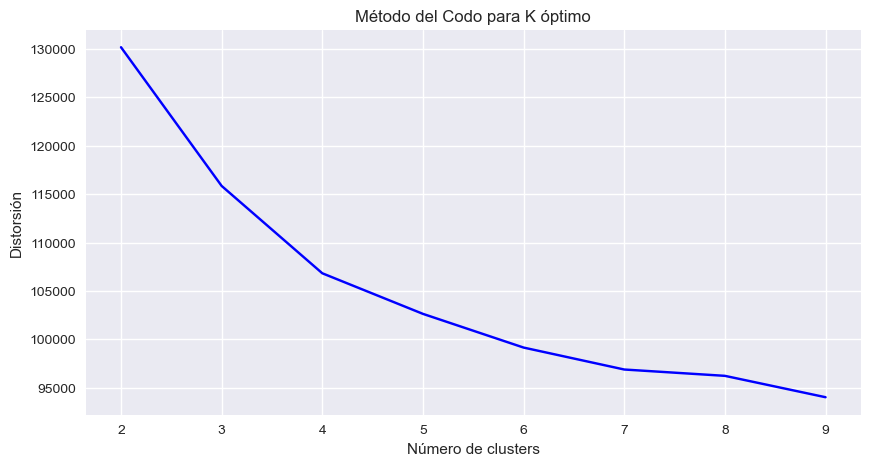

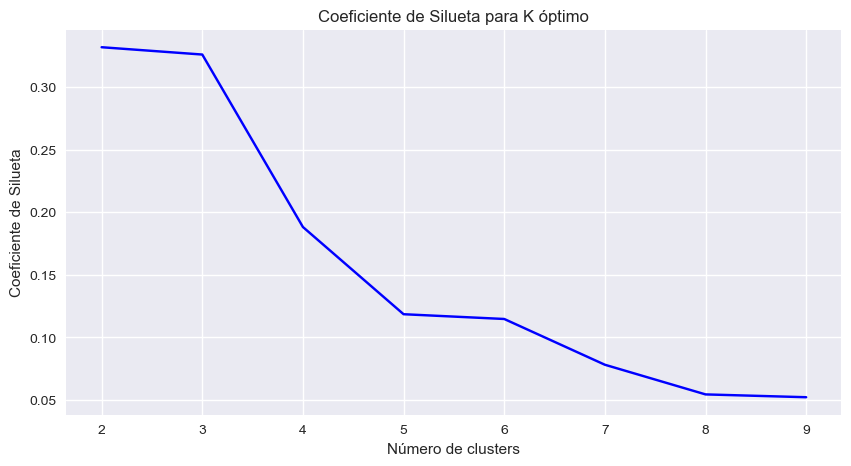

In [ ]:
class RedditClustering:
    def __init__(self, processed_data):
        #Transformacion de texto a valor numerica para procesar datos
        self.vectorizer_title = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
        self.vectorizer_subreddit = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')
        self.vectorizer_description = TfidfVectorizer(max_df=0.5, min_df=5, stop_words='english')

        tfidf_title = self.vectorizer_title.fit_transform(processed_data['titlePost'])
        tfidf_subreddit = self.vectorizer_subreddit.fit_transform(processed_data['tittleSubreddit'])
        tfidf_description = self.vectorizer_description.fit_transform(processed_data['descriptionReddit'])

        combined_tfidf = hstack([tfidf_title, tfidf_subreddit, tfidf_description])

        post_numeric_features  = StandardScaler().fit_transform(processed_data[['upVotes', 'scorePost', 'commentsPost']])
        self.combined_features = hstack([combined_tfidf, post_numeric_features])
        
        
    def get_k_values(self):
        distortions = []
        silhouette_scores = []
        K = range(2, 10)
        for k in K:
            kmeans_model = KMeans(n_clusters=k, random_state=42)
            kmeans_model.fit(self.combined_features)
            distortions.append(kmeans_model.inertia_)
            silhouette_avg = silhouette_score(self.combined_features, kmeans_model.labels_)
            silhouette_scores.append(silhouette_avg)
            print(f"Para k={k}, el coeficiente de silueta es {silhouette_avg}")

        # Visualización del método del codo
        plt.figure(figsize=(10, 5))
        plt.plot(K, distortions, 'bx-')
        plt.xlabel('Número de clusters')
        plt.ylabel('Distorsión')
        plt.title('Método del Codo para K óptimo')
        plt.show()

        # Visualización del coeficiente de silueta
        plt.figure(figsize=(10, 5))
        plt.plot(K, silhouette_scores, 'bx-')
        plt.xlabel('Número de clusters')
        plt.ylabel('Coeficiente de Silueta')
        plt.title('Coeficiente de Silueta para K óptimo')
        plt.show()

    def apply_kmeans(self, k, df):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(self.combined_features)
        clusters = kmeans.labels_
        df['Cluster'] = clusters
        score = silhouette_score(self.combined_features, clusters)
        print("Silhouette Score para clusters:", score)
        return df
    def analyze_clusters(self, df, n_keywords=5):
        cluster_names = {}
        
        for cluster_id in sorted(df['Cluster'].unique()):
            titles_in_cluster = df[df['Cluster'] == cluster_id]['titlePost']
            
            tfidf_matrix = self.vectorizer_title.transform(titles_in_cluster)
            sum_tfidf = tfidf_matrix.sum(axis=0)
            keywords = [(self.vectorizer_title.get_feature_names_out()[i], sum_tfidf[0, i]) 
                        for i in range(sum_tfidf.shape[1])]
            
            sorted_keywords = sorted(keywords, key=lambda x: x[1], reverse=True)[:n_keywords]
            top_keywords = [word for word, score in sorted_keywords]
            
            cluster_name = " / ".join(top_keywords)
            cluster_names[cluster_id] = cluster_name
            
            print(f"Cluster {cluster_id}: {cluster_name}")

        # Asignar nombres a los clusters en el DataFrame
        df['Cluster_Name'] = df['Cluster'].map(cluster_names).astype('category')
        return df
    def assign_subreddit_names(self, df):
        cluster_names = {}

        for cluster_id in sorted(df['Cluster'].unique()):
            subreddits_in_cluster = df[df['Cluster'] == cluster_id]['tittleSubreddit']
            
            most_common_subreddit = subreddits_in_cluster.mode()[0]
            
            cluster_names[cluster_id] = most_common_subreddit
            
            print(f"Cluster {cluster_id}: {most_common_subreddit}")

        df['Cluster_Name'] = df['Cluster'].map(cluster_names).astype('category')
        return df


clustering = RedditClustering(processed_data)
clustering.get_k_values()


In [10]:
processed_data = clustering.apply_kmeans(50, processed_data)
processed_data = clustering.assign_subreddit_names(processed_data)
print(processed_data[['Cluster', 'Cluster_Name']].drop_duplicates())

c:\Users\faboa\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Silhouette Score para clusters: 0.1710344383786576
Cluster 0: nfl
Cluster 1: interestingasfuck
Cluster 2: askreddit
Cluster 3: todayilearned
Cluster 4: politics
Cluster 5: askreddit
Cluster 6: 
Cluster 7: gaming
Cluster 8: warframe
Cluster 9: shitposting
Cluster 10: honkaistarrail
Cluster 11: anime
Cluster 12: mademesmile
Cluster 13: helldivers
Cluster 14: coolguides
Cluster 15: mademesmile
Cluster 16: whitepeopletwitter
Cluster 17: steamdeck
Cluster 18: globaloffensive
Cluster 19: game
Cluster 20: college
Cluster 21: aitah
Cluster 22: manga
Cluster 23: discordapp
Cluster 24: facepalm
Cluster 25: feedthebeast
Cluster 26: wtf
Cluster 27: techsupport
Cluster 28: askmen
Cluster 29: personalfinance
Cluster 30: sysadmin
Cluster 31: curatedtumblr
Cluster 32: classicwow
Cluster 33: escapefromtarkov
Cluster 34: home
Cluster 35: buildapc
Cluster 36: explainlikeimfive
Cluster 37: badroommates
Cluster 38: peterexplainsthejoke
Cluster 39: outoftheloop
Cluster 40: minecraft
Cluster 41: legaladvice


In [11]:
processed_data.head()

,subreddit_id,titlePost,createdPost,scorePost,upVotedRatio,upVotes,commentsPost,tittleSubreddit,subscribersReddit,descriptionReddit,createdReddit,Cluster,Cluster_Name
0,0,price range house like,2023-08-18 10:17:43,11633,0.92,11633,1727,home,243743,,2009-01-25 02:25:57,13,helldivers
1,0,door garage,2023-05-18 16:41:57,6026,0.96,6026,1700,home,243743,,2009-01-25 02:25:57,34,home
2,0,fix garage door torsion spring,2023-08-26 19:44:33,5581,0.86,5581,3644,home,243743,,2009-01-25 02:25:57,21,aitah
3,0,call type design,2023-08-21 17:37:07,2824,0.96,2824,579,home,243743,,2009-01-25 02:25:57,34,home
4,0,inspector said termite damage year old house m...,2023-07-28 17:40:05,2692,0.94,2692,952,home,243743,,2009-01-25 02:25:57,34,home
